In [429]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [430]:
df=pd.read_csv('penguins.csv')
df=df.dropna()
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
4         3450.0  female  2007  
5         3650.0    male  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[333 rows x 8 columns]

In [431]:
df.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      333.000000     333.000000         333.000000   333.000000   
mean        43.992793      17.164865         200.966967  4207.057057   
std          5.468668       1.969235          14.015765   805.215802   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.500000      15.600000         190.000000  3550.000000   
50%         44.500000      17.300000         197.000000  4050.000000   
75%         48.600000      18.700000         213.000000  4775.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   333.000000  
mean   2008.042042  
std       0.812944  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000

In [432]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [433]:
# One Hot encoding species and island columns

df_1=pd.get_dummies(df, columns=["species", "island"], prefix=["species", "island"])
df_1


bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex  \
0              39.1           18.7              181.0       3750.0    male   
1              39.5           17.4              186.0       3800.0  female   
2              40.3           18.0              195.0       3250.0  female   
4              36.7           19.3              193.0       3450.0  female   
5              39.3           20.6              190.0       3650.0    male   
..              ...            ...                ...          ...     ...   
339            55.8           19.8              207.0       4000.0    male   
340            43.5           18.1              202.0       3400.0  female   
341            49.6           18.2              193.0       3775.0    male   
342            50.8           19.0              210.0       4100.0    male   
343            50.2           18.7              198.0       3775.0  female   

     year  species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0    2007               1                  0               0              0   
1    2007               1                  0               0              0   
2    2007               1                  0               0              0   
4    2007               1                  0               0              0   
5    2007               1                  0               0              0   
..    ...             ...                ...             ...            ...   
339  2009               0                  1               0              0   
340  2009               0                  1               0              0   
341  2009               0                  1               0              0   
342  2009               0                  1               0              0   
343  2009               0                  1               0              0   

     island_Dream  island_Torgersen  
0               0                 1  
1               0                 1  
2               0                 1  
4               0                 1  
5               0                 1  
..            ...               ...  
339             1                 0  
340             1                 0  
341             1                 0  
342             1                 0  
343             1                 0  

[333 rows x 12 columns]

In [434]:
df_1.shape

(333, 12)

In [435]:
# Label encoding 'sex'

df_1['sex']=df_1['sex'].astype('category')
df_1['sex']=df_1['sex'].cat.codes
df_2=df_1.drop('sex',1)
df_2

C:\Users\rahul\AppData\Local\Temp\ipykernel_14496\1659957492.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_2=df_1.drop('sex',1)


bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year  \
0              39.1           18.7              181.0       3750.0  2007   
1              39.5           17.4              186.0       3800.0  2007   
2              40.3           18.0              195.0       3250.0  2007   
4              36.7           19.3              193.0       3450.0  2007   
5              39.3           20.6              190.0       3650.0  2007   
..              ...            ...                ...          ...   ...   
339            55.8           19.8              207.0       4000.0  2009   
340            43.5           18.1              202.0       3400.0  2009   
341            49.6           18.2              193.0       3775.0  2009   
342            50.8           19.0              210.0       4100.0  2009   
343            50.2           18.7              198.0       3775.0  2009   

     species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0                 1                  0               0              0   
1                 1                  0               0              0   
2                 1                  0               0              0   
4                 1                  0               0              0   
5                 1                  0               0              0   
..              ...                ...             ...            ...   
339               0                  1               0              0   
340               0                  1               0              0   
341               0                  1               0              0   
342               0                  1               0              0   
343               0                  1               0              0   

     island_Dream  island_Torgersen  
0               0                 1  
1               0                 1  
2               0                 1  
4               0                 1  
5               0                 1  
..            ...               ...  
339             1                 0  
340             1                 0  
341             1                 0  
342             1                 0  
343             1                 0  

[333 rows x 11 columns]

In [436]:
## Min max scaling -- normalise

for i in df_2.iloc[:,:5]:
    df_2[i]=(df_2[i]-df_2[i].min())/(df_2[i].max()-df_2[i].min())
df_2



    

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year  \
0          0.254545       0.666667           0.152542     0.291667   0.0   
1          0.269091       0.511905           0.237288     0.305556   0.0   
2          0.298182       0.583333           0.389831     0.152778   0.0   
4          0.167273       0.738095           0.355932     0.208333   0.0   
5          0.261818       0.892857           0.305085     0.263889   0.0   
..              ...            ...                ...          ...   ...   
339        0.861818       0.797619           0.593220     0.361111   1.0   
340        0.414545       0.595238           0.508475     0.194444   1.0   
341        0.636364       0.607143           0.355932     0.298611   1.0   
342        0.680000       0.702381           0.644068     0.388889   1.0   
343        0.658182       0.666667           0.440678     0.298611   1.0   

     species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0                 1                  0               0              0   
1                 1                  0               0              0   
2                 1                  0               0              0   
4                 1                  0               0              0   
5                 1                  0               0              0   
..              ...                ...             ...            ...   
339               0                  1               0              0   
340               0                  1               0              0   
341               0                  1               0              0   
342               0                  1               0              0   
343               0                  1               0              0   

     island_Dream  island_Torgersen  
0               0                 1  
1               0                 1  
2               0                 1  
4               0                 1  
5               0                 1  
..            ...               ...  
339             1                 0  
340             1                 0  
341             1                 0  
342             1                 0  
343             1                 0  

[333 rows x 11 columns]

In [437]:
# Defining X and y(target)

X=df_2
y=df_1['sex']



In [438]:
X

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year  \
0          0.254545       0.666667           0.152542     0.291667   0.0   
1          0.269091       0.511905           0.237288     0.305556   0.0   
2          0.298182       0.583333           0.389831     0.152778   0.0   
4          0.167273       0.738095           0.355932     0.208333   0.0   
5          0.261818       0.892857           0.305085     0.263889   0.0   
..              ...            ...                ...          ...   ...   
339        0.861818       0.797619           0.593220     0.361111   1.0   
340        0.414545       0.595238           0.508475     0.194444   1.0   
341        0.636364       0.607143           0.355932     0.298611   1.0   
342        0.680000       0.702381           0.644068     0.388889   1.0   
343        0.658182       0.666667           0.440678     0.298611   1.0   

     species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0                 1                  0               0              0   
1                 1                  0               0              0   
2                 1                  0               0              0   
4                 1                  0               0              0   
5                 1                  0               0              0   
..              ...                ...             ...            ...   
339               0                  1               0              0   
340               0                  1               0              0   
341               0                  1               0              0   
342               0                  1               0              0   
343               0                  1               0              0   

     island_Dream  island_Torgersen  
0               0                 1  
1               0                 1  
2               0                 1  
4               0                 1  
5               0                 1  
..            ...               ...  
339             1                 0  
340             1                 0  
341             1                 0  
342             1                 0  
343             1                 0  

[333 rows x 11 columns]

In [439]:
y

0      1
1      0
2      0
4      0
5      1
      ..
339    1
340    0
341    1
342    1
343    0
Name: sex, Length: 333, dtype: int8

In [440]:
X.values

array([[0.25454545, 0.66666667, 0.15254237, ..., 0.        , 0.        ,
        1.        ],
       [0.26909091, 0.51190476, 0.23728814, ..., 0.        , 0.        ,
        1.        ],
       [0.29818182, 0.58333333, 0.38983051, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.63636364, 0.60714286, 0.3559322 , ..., 0.        , 1.        ,
        0.        ],
       [0.68      , 0.70238095, 0.6440678 , ..., 0.        , 1.        ,
        0.        ],
       [0.65818182, 0.66666667, 0.44067797, ..., 0.        , 1.        ,
        0.        ]])

In [441]:
y.values

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,

In [442]:
# spliting into train and test split

indices = np.arange(X.shape[0])
train_ind = int(0.8 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[:train_ind]
test_indices = indices[train_ind:]


X_train, X_test = X.iloc[train_indices].values, X.iloc[test_indices].values
y_train, y_test = y.iloc[train_indices].values, y.iloc[test_indices].values


In [443]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(266, 11)
(67, 11)
(266,)
(67,)


In [444]:
class LogisticRegression():
    def __init__(self, max_iter, lr_rate):
        self.max_iter=max_iter
        self.lr_rate=lr_rate
    def sigmoid(self, z):
        sig=1.0/(1+np.exp(-z))
        return sig
    def cost(self,X,y):
        z= np.dot(self.w,X.T)+self.b
        h=self.sigmoid(z)
        cst=np.mean((-y.T*np.log(h)-(1-y.T)*np.log(1-h)))
        return cst
    def gradient_descent(self,X,y):
        z= np.dot(self.w,X.T)+self.b
        pred=self.sigmoid(z)
        delta=pred-(y)
        d_W=np.dot(X.T,delta)/(X.shape[0])
        d_b=np.sum(delta)/(X.shape[0])
        return d_W,d_b
    def fit(self,X,y):
        self.w=np.zeros(X.shape[1])
        print('Initial weights',self.w)
        self.b=0
        self.loss=[]
        for i in range(self.max_iter):
            d_W,d_b=self.gradient_descent(X,y)
            l=self.cost(X,y)
            self.loss.append(l)
            
            self.w-=self.lr_rate*d_W
            self.b-=self.lr_rate*d_b
            
        return self.w,self.b
    def predict(self,X):
        pred=self.sigmoid(np.dot(self.w,X.T)+self.b)
        p=[]
        for i in pred:
            if i>=0.5:
                p.append(1)
            else:
                p.append(0)
        return p

                
            
            
            
            
        
        
    
        

In [445]:
## Training the model with max_iter=100000 and leraning rate=0.001

l=LogisticRegression(100000,0.001)
l.fit(X_train,y_train)

Initial weights [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(array([ 1.73070446,  2.29408636,  0.95109261,  2.50595973, -0.20411656,
        -0.24781196, -0.74282707, -0.90453487, -0.72208215, -0.62953209,
        -0.54355966]),
 -1.8951739030256556)

In [446]:
print('Weights after train',l.w)

Weights after train [ 1.73070446  2.29408636  0.95109261  2.50595973 -0.20411656 -0.24781196
 -0.74282707 -0.90453487 -0.72208215 -0.62953209 -0.54355966]


In [447]:
## Loss values after training

print('loss after each iteration  ',l.loss)

loss after each iteration   [0.6931471805599453, 0.6931374603988864, 0.6931277477772608, 0.6931180426843557, 0.6931083451094742, 0.6930986550419344, 0.6930889724710704, 0.6930792973862314, 0.6930696297767824, 0.6930599696321039, 0.6930503169415915, 0.693040671694656, 0.6930310338807244, 0.6930214034892382, 0.693011780509655, 0.6930021649314468, 0.6929925567441021, 0.6929829559371234, 0.6929733625000294, 0.6929637764223534, 0.6929541976936446, 0.6929446263034664, 0.6929350622413984, 0.6929255054970345, 0.6929159560599844, 0.6929064139198723, 0.6928968790663378, 0.6928873514890357, 0.6928778311776356, 0.6928683181218218, 0.6928588123112941, 0.6928493137357675, 0.6928398223849709, 0.692830338248649, 0.6928208613165613, 0.6928113915784821, 0.6928019290242002, 0.6927924736435198, 0.6927830254262595, 0.6927735843622529, 0.6927641504413484, 0.692754723653409, 0.6927453039883125, 0.6927358914359515, 0.692726485986233, 0.6927170876290791, 0.6927076963544263, 0.6926983121522257, 0.69268893501244

In [448]:
x=l.predict(X_test)
y=list(y_test)
count=0
for i in range(len(x)):
    if x[i]==y[i]:
        count+=1
accuracy=(count*100)/len(x)
print('Accuracy is ',accuracy)


Accuracy is  91.04477611940298


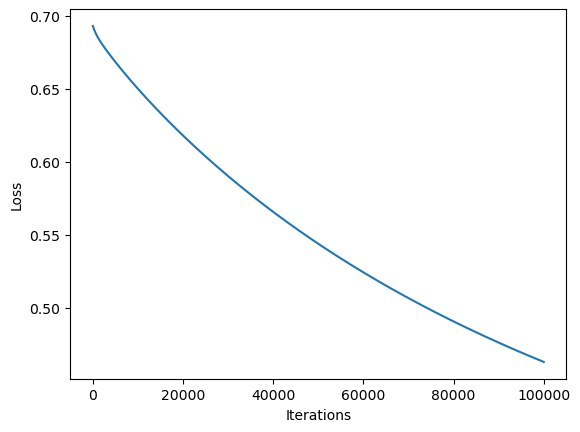

In [449]:
plt.plot(l.loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [450]:
## Changing the hyperparamaters

## max_iter=10000 and learning rate =0.0001

lr=LogisticRegression(10000,0.0001)
lr.fit(X_train,y_train)
            

Initial weights [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(array([ 0.04048253,  0.04068763,  0.03314143,  0.04960212,  0.0048205 ,
        -0.00924177,  0.00304619,  0.00959213,  0.00660676, -0.00028459,
        -0.00292562]),
 0.0033965513792344596)

In [451]:
print('Weights after train',lr.w)

Weights after train [ 0.04048253  0.04068763  0.03314143  0.04960212  0.0048205  -0.00924177
  0.00304619  0.00959213  0.00660676 -0.00028459 -0.00292562]


In [452]:
## Loss values after training

print('loss after each iteration  ',lr.loss)

loss after each iteration   [0.6931471805599453, 0.6931462083740815, 0.6931452362636603, 0.693144264228671, 0.6931432922691029, 0.693142320384945, 0.6931413485761869, 0.693140376842818, 0.6931394051848272, 0.6931384336022038, 0.6931374620949373, 0.6931364906630171, 0.6931355193064322, 0.6931345480251722, 0.6931335768192258, 0.693132605688583, 0.6931316346332328, 0.6931306636531644, 0.6931296927483672, 0.6931287219188307, 0.6931277511645438, 0.6931267804854961, 0.6931258098816768, 0.6931248393530752, 0.6931238688996806, 0.6931228985214823, 0.6931219282184699, 0.6931209579906322, 0.6931199878379589, 0.6931190177604393, 0.6931180477580624, 0.6931170778308179, 0.6931161079786948, 0.6931151382016829, 0.6931141684997709, 0.6931131988729486, 0.6931122293212052, 0.6931112598445298, 0.6931102904429123, 0.6931093211163413, 0.6931083518648066, 0.6931073826882975, 0.693106413586803, 0.693105444560313, 0.6931044756088165, 0.6931035067323028, 0.6931025379307615, 0.6931015692041816, 0.693100600552552

In [453]:
x=lr.predict(X_test)
y=list(y_test)
count=0
for i in range(len(x)):
    if x[i]==y[i]:
        count+=1
accuracy=(count*100)/len(x)
print('Accuracy is ',accuracy)


Accuracy is  46.26865671641791


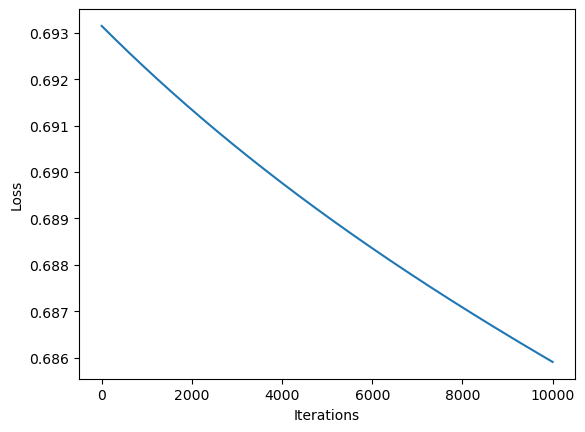

In [454]:
plt.plot(lr.loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [455]:
## Training with a different set of hyperparamters
## max_iter=100000 and learning rate =0.00001

model=LogisticRegression(100000,0.00001)
model.fit(X_train,y_train)

Initial weights [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(array([ 0.04048221,  0.04068734,  0.03314106,  0.0496018 ,  0.00482016,
        -0.00924193,  0.00304604,  0.00959181,  0.00660639, -0.0002848 ,
        -0.00292567]),
 0.003395923673531229)

In [456]:
print('Weights after train',model.w)

Weights after train [ 0.04048221  0.04068734  0.03314106  0.0496018   0.00482016 -0.00924193
  0.00304604  0.00959181  0.00660639 -0.0002848  -0.00292567]


In [457]:
## Loss values after training

print('loss after each iteration  ',model.loss)

loss after each iteration   [0.6931471805599453, 0.6931470833396612, 0.6931469861201318, 0.693146888901357, 0.6931467916833363, 0.69314669446607, 0.6931465972495585, 0.6931465000338012, 0.6931464028187984, 0.6931463056045498, 0.6931462083910558, 0.6931461111783161, 0.6931460139663307, 0.6931459167550997, 0.6931458195446232, 0.6931457223349009, 0.6931456251259328, 0.6931455279177193, 0.6931454307102599, 0.6931453335035549, 0.6931452362976039, 0.6931451390924076, 0.6931450418879653, 0.6931449446842773, 0.6931448474813435, 0.6931447502791641, 0.6931446530777386, 0.6931445558770676, 0.6931444586771506, 0.693144361477988, 0.6931442642795793, 0.693144167081925, 0.6931440698850247, 0.6931439726888786, 0.6931438754934865, 0.6931437782988488, 0.6931436811049652, 0.6931435839118353, 0.6931434867194598, 0.6931433895278384, 0.6931432923369709, 0.6931431951468575, 0.6931430979574983, 0.693143000768893, 0.6931429035810417, 0.6931428063939445, 0.6931427092076013, 0.6931426120220121, 0.693142514837176

In [458]:
x=model.predict(X_test)
y=list(y_test)
count=0
for i in range(len(x)):
    if x[i]==y[i]:
        count+=1
accuracy=(count*100)/len(x)
print('Accuracy is ',accuracy)

Accuracy is  46.26865671641791


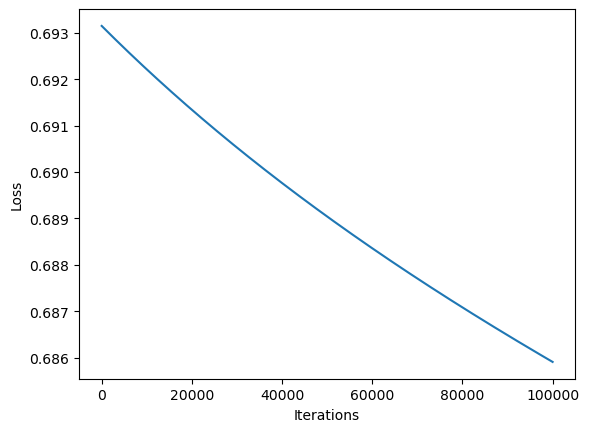

In [459]:
plt.plot(model.loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [460]:
## differnt set of hyperparamters 

## max_iter=100000 and learning rate=0.01


s=model=LogisticRegression(100000,0.01)
s.fit(X_train,y_train)

Initial weights [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(array([ 7.86044586,  7.54157389,  2.21197157,  9.09703402, -0.22498903,
        -0.11419179, -3.35178644, -3.77032979, -2.41685511, -2.20186236,
        -2.61759055]),
 -7.236308021665481)

In [461]:
print('Weights after train',s.w)

Weights after train [ 7.86044586  7.54157389  2.21197157  9.09703402 -0.22498903 -0.11419179
 -3.35178644 -3.77032979 -2.41685511 -2.20186236 -2.61759055]


In [462]:
## Loss values after training

print('loss after each iteration  ',s.loss)

loss after each iteration   [0.6931471805599453, 0.693050148707217, 0.6929538659812704, 0.6928583217738383, 0.6927635056302668, 0.6926694072473126, 0.6925760164709726, 0.6924833232943414, 0.6923913178555012, 0.692299990435439, 0.6922093314559932, 0.6921193314778289, 0.6920299811984417, 0.6919412714501887, 0.6918531931983471, 0.6917657375392009, 0.6916788956981523, 0.691592659027862, 0.6915070190064142, 0.6914219672355064, 0.6913374954386672, 0.691253595459497, 0.6911702592599342, 0.6910874789185458, 0.6910052466288423, 0.6909235546976158, 0.6908423955433023, 0.6907617616943668, 0.6906816457877106, 0.690602040567103, 0.6905229388816325, 0.690444333684183, 0.6903662180299293, 0.6902885850748546, 0.6902114280742896, 0.6901347403814726, 0.6900585154461285, 0.6899827468130697, 0.6899074281208163, 0.689832553100236, 0.6897581155732033, 0.6896841094512786, 0.6896105287344044, 0.6895373675096225, 0.6894646199498082, 0.6893922803124222, 0.6893203429382811, 0.6892488022503469, 0.6891776527525301

In [463]:
x=s.predict(X_test)
y=list(y_test)
count=0
for i in range(len(x)):
    if x[i]==y[i]:
        count+=1
accuracy=(count*100)/len(x)
print('Accuracy is ',accuracy)

Accuracy is  95.5223880597015


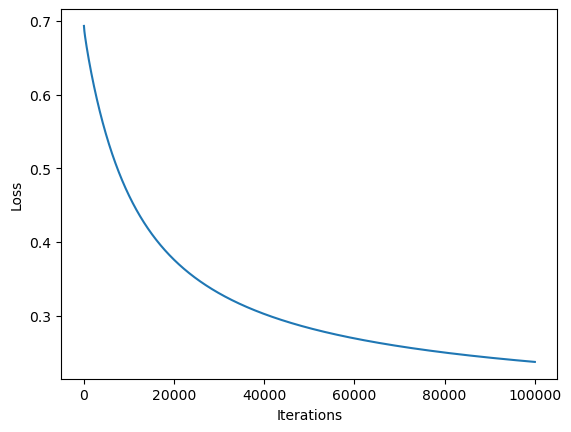

In [464]:
plt.plot(s.loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [466]:
import pickle
pickle.dump(s.w, open( "rveerava_assignment1_part1.p", "wb" ) )